In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
import nltk
%matplotlib inline
import re
import os
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from gensim.models import doc2vec
from collections import namedtuple
from gensim.models.doc2vec import Doc2Vec

In [2]:
path = os.getcwd()
files = os.listdir('/home/darthbhyrava/2018/doc2vec/data/')
files_xls = [f for f in files if f[-4:] == 'xlsx']
len(files_xls)

170

In [3]:
df = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel(path+'/data/{0}'.format(f), encoding = "utf_8")
    df = df.append(data)

In [4]:
data = df[["text", "user_name", "lang"]]

In [5]:
data_en = data[data["lang"] == "en"]
data_en = data_en.drop_duplicates()

In [6]:
index = data_en.index[data_en["text"] == 0]
index

Int64Index([647, 1365, 677, 555], dtype='int64')

In [7]:
data_en = data_en.drop(index= index)

In [8]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [9]:
def clean_text(text, remove_stopwords = True):
    text = text.lower().encode('utf-8')
    
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        
        
        text = " ".join(new_text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', '', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\'""', '', text)
    text = text.replace('‘', '').strip()
    text = text.replace('’', '').strip()
    

    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

In [10]:
data_en["clean_text"] = data_en["text"].apply(lambda x: clean_text(x))

In [11]:
data_en["tokenized_text"] = data_en["clean_text"].apply(lambda x: word_tokenize(x))

In [12]:
doc1 = data_en["tokenized_text"]
docs_tokenized = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(doc1):
    words = text
    tags = [i]
    docs_tokenized.append(analyzedDocument(words, tags))

In [13]:
# model_doc2vec = doc2vec.Doc2Vec(docs_tokenized, vector_size = 1000, min_count = 500, workers = 4)

In [15]:
model_doc2vec_dm = doc2vec.Doc2Vec(docs_tokenized, vector_size= 750, dm =1, alpha = 0.01, epochs = 5,min_count =50, seed = 123)

In [72]:
model_doc2vec_dm.save('./d2v_dm.d2v')

In [15]:
model_doc2vec_dm = Doc2Vec.load('./d2v_dm.d2v')

In [16]:
print len(docs_tokenized)

832153


In [17]:
bjp1 = analyzedDocument(words=['bjp4india', 'mudra', 'yojana', 'work', 'mandya'], tags=[232])
bjp2 = analyzedDocument(words=['vijayrupanibjp', 'narendramodi', 'bjp4india', 'bjp4gujarat', 'live', 'drama', 'speak', 'abt', 'achievements', 'dialogues', 'emotional', 'words', 'work'], tags=[319])
bjp3 = analyzedDocument(words=['congratulations', 'bjp4india', 'bjp4gujarat', 'win', 'well', 'fought', 'incindia'], tags=[322])
bjp4 = analyzedDocument(words=['narendramodi', 'sir', 'please', 'solve', 'issue', 'help', 'students', 'state'], tags=[774])
bjp5 = analyzedDocument(words=['year', 'passed', 'demonitaisation', 'still', 'genuine', 'satisfactory', 'solution', 'framed', 'central', 'government', 'poor', 'achievement', 'modi', 'government'], tags=[811]) 

cong1 = analyzedDocument(words=['mlarbpatil', 'cmofkarnataka', 'incbhalki', 'mlcvijaysingh', 'eshwar', 'khandre', 'siddaramaiah', 'rroshanbaigoff1', 'iyckar', 'nice', 'work', 'sir', 'ji'], tags=[0])
cong2 = analyzedDocument(words=['rahulinkarnataka', 'day', '3', 'janaaashirwadayatre', 'officeofrg'], tags=[29])
cong3 = analyzedDocument(words=['congress', 'win', 'karnataka'], tags=[31])
cong4 = analyzedDocument(words=['honorable', 'cmofkarnataka', 'siddaramaiah', 'present', 'state', 'budget', 'friday', 'navakarnatakanirmana'], tags=[32])
cong5 = analyzedDocument(words=['incindia', 'congratulations', 'rahul', 'ji', 'r', 'fev', 'hero', 'always', 'support', 'congress'], tags=[77])

np1 = analyzedDocument(words=['check', 'review', 'elements', 'mall', 'google', 'maps', 'ongooglemaps'], tags=[17])
np2 = analyzedDocument(words=['follow', 'link', 'join', 'whatsapp', 'group'], tags=[21])
np3 = analyzedDocument(words=['rti', 'query', 'reveals', '40', 'seats', 'mumbai', 'ahmedabad', 'trains', 'go', 'vacant', 'bullet', 'train', 'dream', 'looks', 'like', 'waste'], tags=[25])
np4 = analyzedDocument(words=['good', 'night', '😇😇😇😇😇'], tags=[493])
np5 = analyzedDocument(words=['true', 'gentleman', 'imvkohli'], tags=[3490])

list_tagg_tweets = [bjp1,bjp2,bjp3,bjp4,bjp5,cong1,cong2,cong3,cong4,cong5,np1,np2,np3,np4,np5]
print list_tagg_tweets

bjp = [293665, 293752, 293755, 76851, 76888]
inc = [293433, 293462, 293464, 293465, 293510]
non_political = [293450, 60445, 293458, 293926, 117934]

[AnalyzedDocument(words=['bjp4india', 'mudra', 'yojana', 'work', 'mandya'], tags=[232]), AnalyzedDocument(words=['vijayrupanibjp', 'narendramodi', 'bjp4india', 'bjp4gujarat', 'live', 'drama', 'speak', 'abt', 'achievements', 'dialogues', 'emotional', 'words', 'work'], tags=[319]), AnalyzedDocument(words=['congratulations', 'bjp4india', 'bjp4gujarat', 'win', 'well', 'fought', 'incindia'], tags=[322]), AnalyzedDocument(words=['narendramodi', 'sir', 'please', 'solve', 'issue', 'help', 'students', 'state'], tags=[774]), AnalyzedDocument(words=['year', 'passed', 'demonitaisation', 'still', 'genuine', 'satisfactory', 'solution', 'framed', 'central', 'government', 'poor', 'achievement', 'modi', 'government'], tags=[811]), AnalyzedDocument(words=['mlarbpatil', 'cmofkarnataka', 'incbhalki', 'mlcvijaysingh', 'eshwar', 'khandre', 'siddaramaiah', 'rroshanbaigoff1', 'iyckar', 'nice', 'work', 'sir', 'ji'], tags=[0]), AnalyzedDocument(words=['rahulinkarnataka', 'day', '3', 'janaaashirwadayatre', 'offi

In [87]:
pol1 = analyzedDocument(words=['bjp4india', 'mudra', 'yojana', 'work', 'mandya'], tags=[232])
pol2 = analyzedDocument(words=['vijayrupanibjp', 'narendramodi', 'bjp4india', 'bjp4gujarat', 'live', 'drama', 'speak', 'abt', 'achievements', 'dialogues', 'emotional', 'words', 'work'], tags=[319])
pol3 = analyzedDocument(words=['congratulations', 'bjp4india', 'bjp4gujarat', 'win', 'well', 'fought', 'incindia'], tags=[322])
pol4 = analyzedDocument(words=['narendramodi', 'sir', 'please', 'solve', 'issue', 'help', 'students', 'state'], tags=[774])
pol5 = analyzedDocument(words=['year', 'passed', 'demonitaisation', 'still', 'genuine', 'satisfactory', 'solution', 'framed', 'central', 'government', 'poor', 'achievement', 'modi', 'government'], tags=[811])
pol6 = analyzedDocument(words=['mlarbpatil', 'cmofkarnataka', 'incbhalki', 'mlcvijaysingh', 'eshwar', 'khandre', 'siddaramaiah', 'rroshanbaigoff1', 'iyckar', 'nice', 'work', 'sir', 'ji'], tags=[0])
pol7 = analyzedDocument(words=['rahulinkarnataka', 'day', '3', 'janaaashirwadayatre', 'officeofrg'], tags=[29])
pol8 = analyzedDocument(words=['congress', 'win', 'karnataka'], tags=[31])
pol9 = analyzedDocument(words=['honorable', 'cmofkarnataka', 'siddaramaiah', 'present', 'state', 'budget', 'friday', 'navakarnatakanirmana'], tags=[32])
pol10 = analyzedDocument(words=['incindia', 'congratulations', 'rahul', 'ji', 'r', 'fev', 'hero', 'always', 'support', 'congress'], tags=[77])
pol11 = analyzedDocument(words=['ranjithsgowda4', 'kempraj1', 'lingadruva', 'sagargo57456935', 'bosstejaswini', 'inckanakapura', 'iamdkshivakumar', 'officeofrg', 'srivatsayb', 'inckarnataka', 'nice', 'brother'], tags=[6])
pol12 = analyzedDocument(words=['sushmaswaraj', 'italyinindia', 'great', 'job'], tags=[15])
pol13 = analyzedDocument(words=['honorable', 'cmofkarnataka', 'siddaramaiah', 'present', 'state', 'budget', 'friday', 'navakarnatakanirmana'], tags=[32])
pol14 = analyzedDocument(words=['congratulations', 'officeofrg', 'shri', 'rahul', 'gandhiji', 'filed', 'nomination', 'president', 'post', 'incindia', 'kcvenugopal', 'inc', 'siddaramaiah', 'cmofkarnataka', 'divyaspandana'], tags=[57])
pol15 = analyzedDocument(words=['birthdaywishes', 'congress', 'president', 'smt', 'soniagandhi', 'ji', 'may', 'god', 'bless', 'u', 'good', 'health', 'happiness', 'success', 'long', 'life', 'may', 'commitment', 'compassion', 'empathy', 'poor', 'marginalized', 'continue', 'forever', 'inc', 'incindia', 'officeofrg', 'inckarnataka'], tags=[58])
pol16 = analyzedDocument(words=['incindia', 'congratulations', 'wish', 'best', 'congress', 'party', 'gujarat', 'election', 'going', 'good', 'job', '80', 'seat', 'thats', 'hard', 'work'], tags=[82])
pol17 = analyzedDocument(words=['narendramodi', 'hk', 'people', "'s", 'heartily', 'welcome', 'modi', 'ji', 'bidar', 'glb', 'new', 'railway', 'line', 'inauguration', 'gulbarga', 'railwy', 'divisions'], tags=[117])
pol18 = analyzedDocument(words=['siddaramaiah', 'bsybjp', 'withdks', 'sidhramia', '2018', 'c', 'chamundeshwari', 'consituancy', 'hisleading', 'huge', 'margin', 'bcz', 'c', 'work', 'karnnataka', 'people', 'big', 'buisnessman'], tags=[146])
pol19 = analyzedDocument(words=['bjp', 'party', 'playing', 'like', '20', '20', 'politics', 'knows', 'next', 'govt', 'congress', 'party', '2019', 'rahul', 'gandhi', 'next', 'p', 'india'], tags=[150])
pol20 = analyzedDocument(words=['1st', 'year', 'anniversary', 'disastous', 'demonitisation', 'black', 'day', 'tahirnsui', 'dineshgrao', 'arshadrizwan', 'officeofrg', 'nsui', 'inckarnataka', 'gouda', 'basan', 'fairoz', 'jk', 'manjunathansui', 'nsuidavangere', 'myaskhi', 'priyankkharge', 'noormdnsui', 'incindia', 'hardikpatel', 'umarkhalidjnu'], tags=[271])
pol21 = analyzedDocument(words=['dr', 'manmohan', 'singh', 'shows', 'mirror', 'truth', 'gives', 'reality', 'check', 'prime', 'minister', 'modi', 'driven', 'canards', 'false', 'propaganda', 'face', 'imminent', 'defeat', 'gujarat', 'officeofrg', 'dineshgrao', 'tahirnsui', 'noormdnsui', 'gouda', 'basan', 'fairoz', 'jk', 'guptar', 'incindia'], tags=[286])
pol22 = analyzedDocument(words=['vijayrupanibjp', 'narendramodi', 'bjp4india', 'bjp4gujarat', 'live', 'drama', 'speak', 'abt', 'achievements', 'dialogues', 'emotional', 'words', 'work'], tags=[319])
pol23 = analyzedDocument(words=['congratulations', 'bjp4india', 'bjp4gujarat', 'win', 'well', 'fought', 'incindia'], tags=[322])
pol24 = analyzedDocument(words=['inckarnataka', 'amitshah', 'take', 'look', 'complete', 'story'], tags=[328])
pol25 = analyzedDocument(words=['gujarat', 'assembly', 'bjp', 'leads', '106', 'seats', 'congress', 'leads', '74', 'seats'], tags=[921])
pol26 = analyzedDocument(words=['pm', 'narendra', 'modi', 'stresses', 'preventive', 'healthcare', 'urges', 'people', 'take', 'cleanliness', 'pledge'], tags=[11752])
pol27 = analyzedDocument(words=['bjp4karnataka', 'siddaramaiah', 'malviyamit', 'bsybjp', 'mepratap', 'piyushgoyal', 'shobhabjp', 'ctravi', 'bjp', 'stop', 'lying', 'bjp', 'r', 'sponsorin', 'terrorism'], tags=[13588])
pol28 = analyzedDocument(words=['dineshgrao', 'bilal', 'motorwala', 'amitshah', 'cmofkarnataka', 'bjp4karnataka', 'sir', 'u', 'exposed', 'jumla', 'bjp', '👏👏👏'], tags=[13602])
pol29 = analyzedDocument(words=['bsriramulu', 'bjp', 'narendramodi', 'bjp4karnataka', 'bsybjp', 'gsreddybjp', 'election', '3', 'months', 'want', 'help', 'slumps', '👿👿👿'], tags=[13688])
pol30 = analyzedDocument(words=['1', '1', 'dear', 'mr', 'modi', '3', 'years', 'since', 'sworn', 'power', '3', 'years', 'wasted', 'much', 'misfortune', 'country'], tags=[15915])

list_pol_tweets = [pol1,pol2,pol3,pol4,pol5,pol6,pol7,pol8,pol9,pol10,pol11,pol12,pol13,pol14,pol15,pol16,pol17,pol18,pol19,pol20,pol21,pol22,pol23,pol24,pol25,pol26,pol27,pol28,pol29,pol30]
pol = [76851, 76888, 76998, 87146, 87160, 87246, 89473, 126196, 293433, 293439, 293448, 293462 ,293464, 293465, 293490, 293491, 293510, 293515, 293550, 293579, 293583, 293665, 293704, 293719, 293752, 293755, 293761, 370943, 458920]
print len(pol)

29


In [69]:
for tweet in docs_tokenized:
    for g in list_pol_tweets:
        if g[0] == tweet[0]:
            print tweet[1] 

[76851]
[76888]
[76998]
[87146]
[87160]
[87246]
[89473]
[126196]
[293433]
[293439]
[293448]
[293462]
[293464]
[293465]
[293465]
[293490]
[293491]
[293510]
[293515]
[293550]
[293579]
[293583]
[293665]
[293704]
[293719]
[293752]
[293752]
[293755]
[293755]
[293761]
[370943]
[458920]


In [88]:
apol1 = analyzedDocument(words=['check', 'review', 'elements', 'mall', 'google', 'maps', 'ongooglemaps'], tags=[17])
apol2 = analyzedDocument(words=['follow', 'link', 'join', 'whatsapp', 'group'], tags=[21])
apol3 = analyzedDocument(words=['rti', 'query', 'reveals', '40', 'seats', 'mumbai', 'ahmedabad', 'trains', 'go', 'vacant', 'bullet', 'train', 'dream', 'looks', 'like', 'waste'], tags=[25])
apol4 = analyzedDocument(words=['good', 'night', '😇😇😇😇😇'], tags=[493])
apol5 = analyzedDocument(words=['true', 'gentleman', 'imvkohli'], tags=[3490])
apol6 = analyzedDocument(words=['beingsalmankhan', 'bhai', 'come', 'hubli', 'open', 'ur', 'branch', 'hubli', 'karnntaka', 'lots', 'poor', 'people', 'suffering', 'major', 'diseas', 'plz', 'come', 'organise', 'function'], tags=[167])
apol7 = analyzedDocument(words=['wa', 'kaju', 'super', 'fantastic', 'sadi', 'looking', 'cute', 'smart', 'dear👌'], tags=[472])
apol8 = analyzedDocument(words=['happy', 'birthday', 'cute', 'handsome', 'world', 'one', 'salman', 'khan', 'god', 'bless', 'tc', '🤔✌'], tags=[399])
apol9 = analyzedDocument(words=['wish', 'happy', 'deepavali'], tags=[34])
apol10 = analyzedDocument(words=['priyanka', 'chopra', 'speaks', 'breaking', 'glass', 'ceiling'], tags=[10988])
apol11 = analyzedDocument(words=['deepikapadukone', 'deeps', 'jss', 'lov', 'u', 'ur', 'performance', 'keep', 'rockin', 'waitin', 'chennai', 'express', 'best', 'bebe'], tags=[13021])
apol12 = analyzedDocument(words=['madhuridixit1', 'lov', 'killing', 'luks', 'n', 'dance', 'yjhd', 'mam', 'u', 'hav', 'brought', 'double', 'charm', 'u', 'r', 'indian', 'idol', 'god', 'bles'], tags=[13028])
apol13 = analyzedDocument(words=['kicchasudeep', 'mr', 'sudeepa', 'showman', 'vaarada', 'kathe', 'preethiya', 'kichhana', 'jothe', 'awesome', 'lovely', 'n', 'super', 'show', 'mr', 'ever', 'young', '😊'], tags=[13035])
apol14 = analyzedDocument(words=['congratulations', 'p', 'v', 'sindhu', 'winning', 'maiden', 'indian', 'open', 'series', 'title', 'beating', 'olympic', 'winner', 'carolina', 'marin', 'finals'], tags=[15851])
apol15 = analyzedDocument(words=['kicchasudeep', 'super', 'bigboss'], tags=[61])
apol16 = analyzedDocument(words=['tejaswini', 'kicchasudeep', 'teamkiccha', 'kicchasudeepfc', 'kicchanhudugru', 'siksfa', 'official', 'beingsudeepians', 'ksfa', 'official', 'telugukicchafc', 'kicchafans24x7', 'seunji', 'many', 'happy', 'returns', 'day', 'wish', 'happy', 'birthday'], tags=[65])
apol17 = analyzedDocument(words=['immanjulaa', 'congratulations', 'mam', 'happy', 'married', 'life'], tags=[85])
apol18 = analyzedDocument(words=['fanbollywoodtwz', 'salman', 'bhai', 'come', 'hubli', 'open', 'branch', 'human', 'foundation'], tags=[168])
apol19 = analyzedDocument(words=['today', 'met', 'bollywood', 'actor', 'aijaz', 'khan', 'hotel', 'naveen', 'hubli'], tags=[173])
apol20 = analyzedDocument(words=['modeling', 'photographer', '8095428777'], tags=[248])
apol21 = analyzedDocument(words=['super', 'brother', 'boss', 'back'], tags=[335])
apol22 = analyzedDocument(words=['ssrajamouli', 'happy', 'birthday', 'sir', '🎉'], tags=[340])
apol23 = analyzedDocument(words=['work', 'hard', 'silence', 'ignore', 'drama', 'negativity', 'surrounding', 'let', 'success', 'noise'], tags=[750])
apol24 = analyzedDocument(words=['india', 'srilanka', 'teames', 'arrive', 'bhubaneswar', 'capital', 'odisha', 'today', 'monday', 'evening', 't20', 'match', 'barabati', 'stadium', 'cuttack'], tags=[936])
apol25 = analyzedDocument(words=['inside', 'world', "'s", 'largest', 'building', 'washington', 'passenger', 'planes', 'made'], tags=[968])
apol26 = analyzedDocument(words=['female', 'tiger', 'dead', 'due', 'illness', 'nandan', 'kanan', 'zoo', 'bhubsneswar', 'odisha', 'numbers', 'tiger', 'decrease', '24', 'zoo', 'among', 'white', 'colour', 'tiger', '8'], tags=[993])
apol27 = analyzedDocument(words=['hearty', 'congratulations', 'virat', 'kohli', 'receiving', 'padma', 'shri', 'award', 'president', 'india', '🇮🇳'], tags=[15850])
apol28 = analyzedDocument(words=['watch', 'big5', '10', 'friday', 'edition'], tags=[10074])
apol29 = analyzedDocument(words=['lets', 'make', 'count'], tags=[11885])
apol30 = analyzedDocument(words=['samsung', 'notes', 'kannadagrahaka', 'samsungmobile', 'samsungmobileus', 'samsung', 'samsungmobilein', 'support', 'languages', 'many', 'indic', 'languages', 'kannada', 'taken', 'granted'], tags=[13977])

list_apol_tweets = [apol1,apol2,apol3,apol4,apol5,apol6,apol7,apol8,apol9,apol10,apol11,apol12,apol13,apol14,apol15,apol16,apol17,apol18,apol19,apol20,apol21,apol22,apol23,apol24,apol25,apol26,apol27,apol28,apol29,apol30]
apol = [60445, 77013, 77045, 77070, 86579, 86586, 86593, 87535, 89408, 89409, 117934, 124518, 124577, 125432, 125435, 126329, 127036, 210456, 210457, 214388, 293450, 293454, 293458, 293467, 293494, 293498, 293518, 293600, 293601, 293606, 293681, 293768, 293773, 293832, 293905, 293926, 294183, 320098, 337429, 361904, 387681, 428865, 429104, 429144, 431558, 505937, 569876, 597006, 597007, 617270, 671741, 724829, 736297]
print len(apol)

53


In [72]:
for tweet in docs_tokenized:
    for g in list_apol_tweets:
        if g[0] == tweet[0]:
            print tweet[1] 

[60445]
[77013]
[77045]
[77070]
[86579]
[86586]
[86593]
[87535]
[89408]
[89409]
[117934]
[124518]
[124577]
[125432]
[125435]
[126329]
[127036]
[210456]
[210457]
[214388]
[293450]
[293454]
[293458]
[293467]
[293494]
[293498]
[293518]
[293600]
[293601]
[293606]
[293681]
[293768]
[293773]
[293832]
[293905]
[293926]
[294183]
[320098]
[337429]
[361904]
[387681]
[428865]
[429104]
[429144]
[431558]
[505937]
[569876]
[597006]
[597007]
[617270]
[671741]
[724829]
[736297]


In [19]:
bjp = [293665, 293752, 293755, 76851, 76888]
inc = [293433, 293462, 293464, 293465, 293510]
non_political = [293450, 60445, 293458, 293926, 117934]

In [20]:
for p in bjp:
    print(docs_tokenized[p])

AnalyzedDocument(words=['bjp4india', 'mudra', 'yojana', 'work', 'mandya'], tags=[293665])
AnalyzedDocument(words=['vijayrupanibjp', 'narendramodi', 'bjp4india', 'bjp4gujarat', 'live', 'drama', 'speak', 'abt', 'achievements', 'dialogues', 'emotional', 'words', 'work'], tags=[293752])
AnalyzedDocument(words=['congratulations', 'bjp4india', 'bjp4gujarat', 'win', 'well', 'fought', 'incindia'], tags=[293755])
AnalyzedDocument(words=['narendramodi', 'sir', 'please', 'solve', 'issue', 'help', 'students', 'state'], tags=[76851])
AnalyzedDocument(words=['year', 'passed', 'demonitaisation', 'still', 'genuine', 'satisfactory', 'solution', 'framed', 'central', 'government', 'poor', 'achievement', 'modi', 'government'], tags=[76888])


In [21]:
import time

In [22]:
def get_index(party, topn):
    index_party = []
    
    for p in party:
        similar_tweets = model_doc2vec_dm.docvecs.most_similar(p, topn=topn)

        for i, row in enumerate(similar_tweets):
            idx = row[0]
            index_party.append(idx)

    return index_party
        

In [24]:
start_time = time.time()
index_bjp = get_index(bjp, 2000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 187.878419876 seconds ---


In [25]:
len(index_bjp)

10000

In [81]:
import random
nums = [x for x in range(len(docs_tokenized))]
random.shuffle(nums)

In [82]:
for point in docs_tokenized:
    if point[1] == [12]:
        print type(point[1][0])
        break

    

<type 'int'>


In [89]:
p_dict = {}
np_dict = {}
for nonp in apol:
    np_dict[nonp] = []
for p in pol:
    p_dict[p] = []
for i in range(25000):
    rand_v = nums[i]
    for p in pol:
        distance1 = model_doc2vec_dm.docvecs.distance(p, rand_v)
        p_dict[p].append(distance1)
    for nonp in apol:
        distance2 = model_doc2vec_dm.docvecs.distance(nonp, rand_v)
        np_dict[nonp].append(distance2)

In [90]:
for p in pol:
    print len(p_dict[p])
for nonp in apol:
    print len(np_dict[nonp])


25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000
25000


In [91]:
mean_p = {}
mean_np = {}
for p in pol:
    mean_p[p] = np.mean(p_dict[p])
for nonp in apol:
    mean_np[nonp] = np.mean(np_dict[nonp])
print mean_p
print mean_np

{89473: 0.6617961913891557, 293510: 0.7325369939774766, 293761: 1.0626177953754588, 293515: 0.6668662745752338, 76888: 0.7841648917883978, 293665: 1.1258997600558918, 458920: 0.6503602207121573, 293550: 1.0351774800474953, 293704: 0.7711241564645124, 76851: 0.603745369356634, 293433: 0.8945270465041012, 293439: 1.1426738714085203, 76998: 0.5974851790879713, 293448: 0.6211153958555876, 293579: 0.8895667604063389, 87246: 1.1285614267692494, 293583: 0.6994679536519237, 293752: 0.979716403459226, 293462: 0.855482517822788, 293719: 0.776732971041954, 293464: 0.6310871471878023, 293465: 1.1080684732299695, 87146: 0.6625663622086929, 293490: 0.6429673909403447, 293491: 0.6318058155486665, 126196: 0.7363050875957415, 87160: 0.7045236666098502, 293755: 1.093178168467106, 370943: 0.9654758247805049}
{89409: 0.6770319693398954, 293768: 0.7058665559570624, 597006: 0.657884494432906, 428865: 0.6335364894260535, 293773: 0.8569540196406179, 77070: 0.7055021051218653, 597007: 0.6290231452283647, 29390

In [92]:
centroid_list_p = []
centroid_list_np = []
centroid_p = []
centroid_np = []
len_vec = len(model_doc2vec_dm.docvecs.vectors_docs[p])

for i in range(len_vec):
    centroid_p.append(0.00)
    centroid_np.append(0.00)
    
for p in pol:
    centroid_list_p.append(model_doc2vec_dm.docvecs.vectors_docs[p])
for vec in centroid_list_p:
    for i,val in enumerate(vec):
        centroid_p[i] += val
for val in centroid_p:
    val = float(val)/float(len(centroid_list_p))
    
for n in apol:
    centroid_list_np.append(model_doc2vec_dm.docvecs.vectors_docs[n])
for vec in centroid_list_np:
    for i,val in enumerate(vec):
        centroid_np[i] += val
for val in centroid_np:
    val = float(val)/float(len(centroid_list_np))



In [93]:
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
pol_list = []
nonp_list = []
polar_d = []
for i in range(25000):
    rand_v = model_doc2vec_dm.docvecs.vectors_docs[nums[i]]
    d1 = cosine_similarity([rand_v], [centroid_p])
    d2 = cosine_similarity([rand_v], [centroid_np])
#     if d1>d2 and (d1-d2)>0.2:
#         polar_d.append('red')
#     elif d1<d2 and (d2-d1)>0.2:
#         polar_d.append('blue')
#     else:
#         polar_d.append('none')
    if d1>d2:
        polar_d.append('red')
    else:
        polar_d.append('blue')
        

In [95]:
print rand_v.shape

(750,)


In [96]:
from sklearn.manifold import TSNE

In [97]:
from sklearn.decomposition import PCA
x = []
for i in range(25000):
    x.append(model_doc2vec_dm.docvecs.vectors_docs[nums[i]])
pca = PCA(n_components=2)
result = pca.fit_transform(x)


In [1]:
plot_g = pd.DataFrame()
plot_g['x']=result[:,0]
plot_g['y']=result[:,1]
plot_g['p']=polar_d

NameError: name 'pd' is not defined

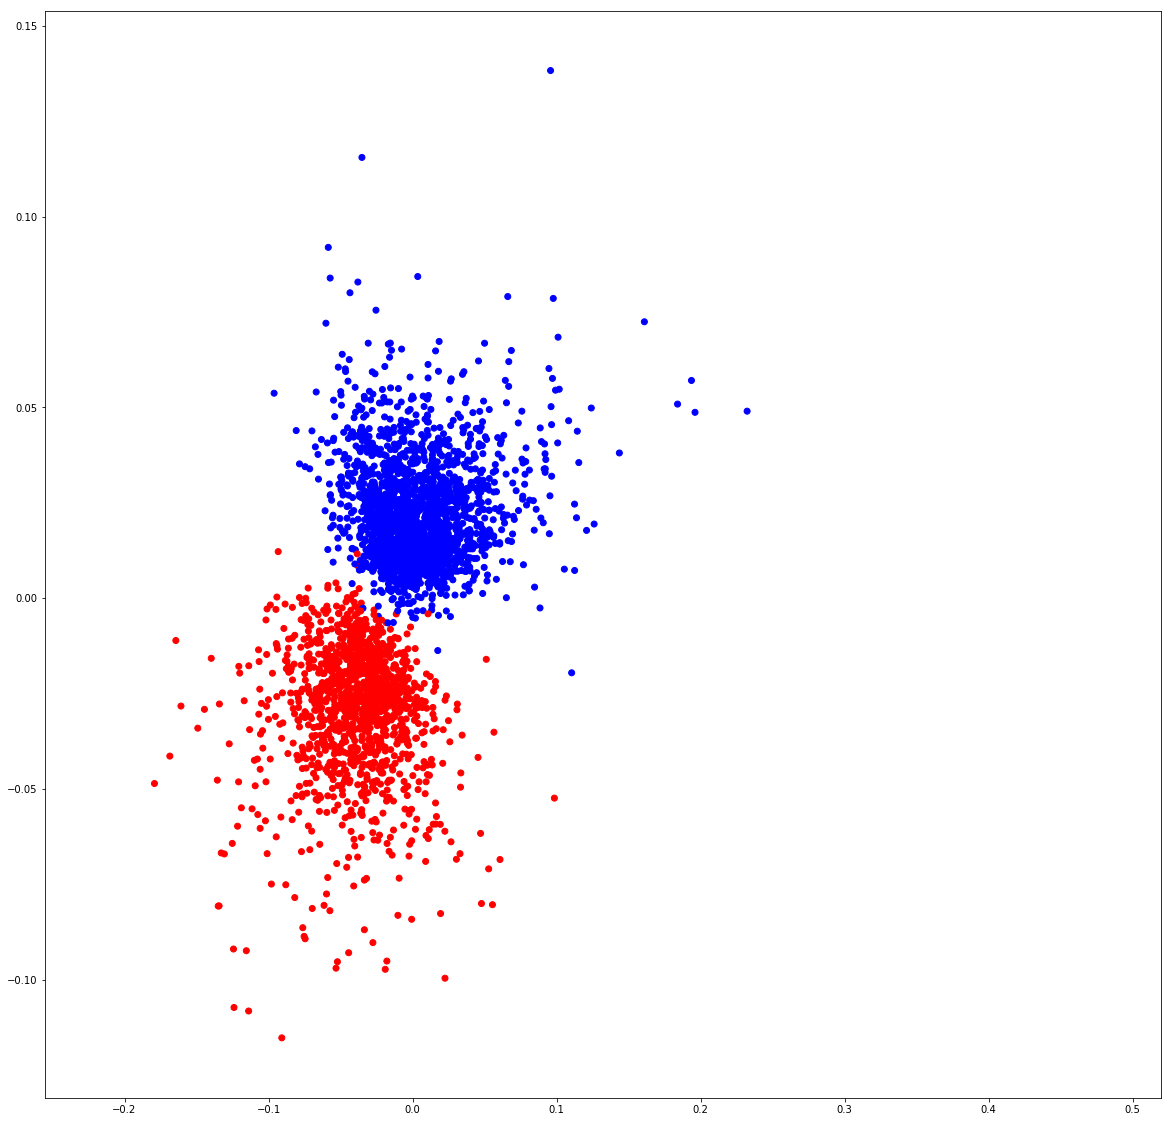

In [99]:
plt.figure(figsize=(20,20))
plt.scatter(plot_g['x'], plot_g['y'], c=polar_d)


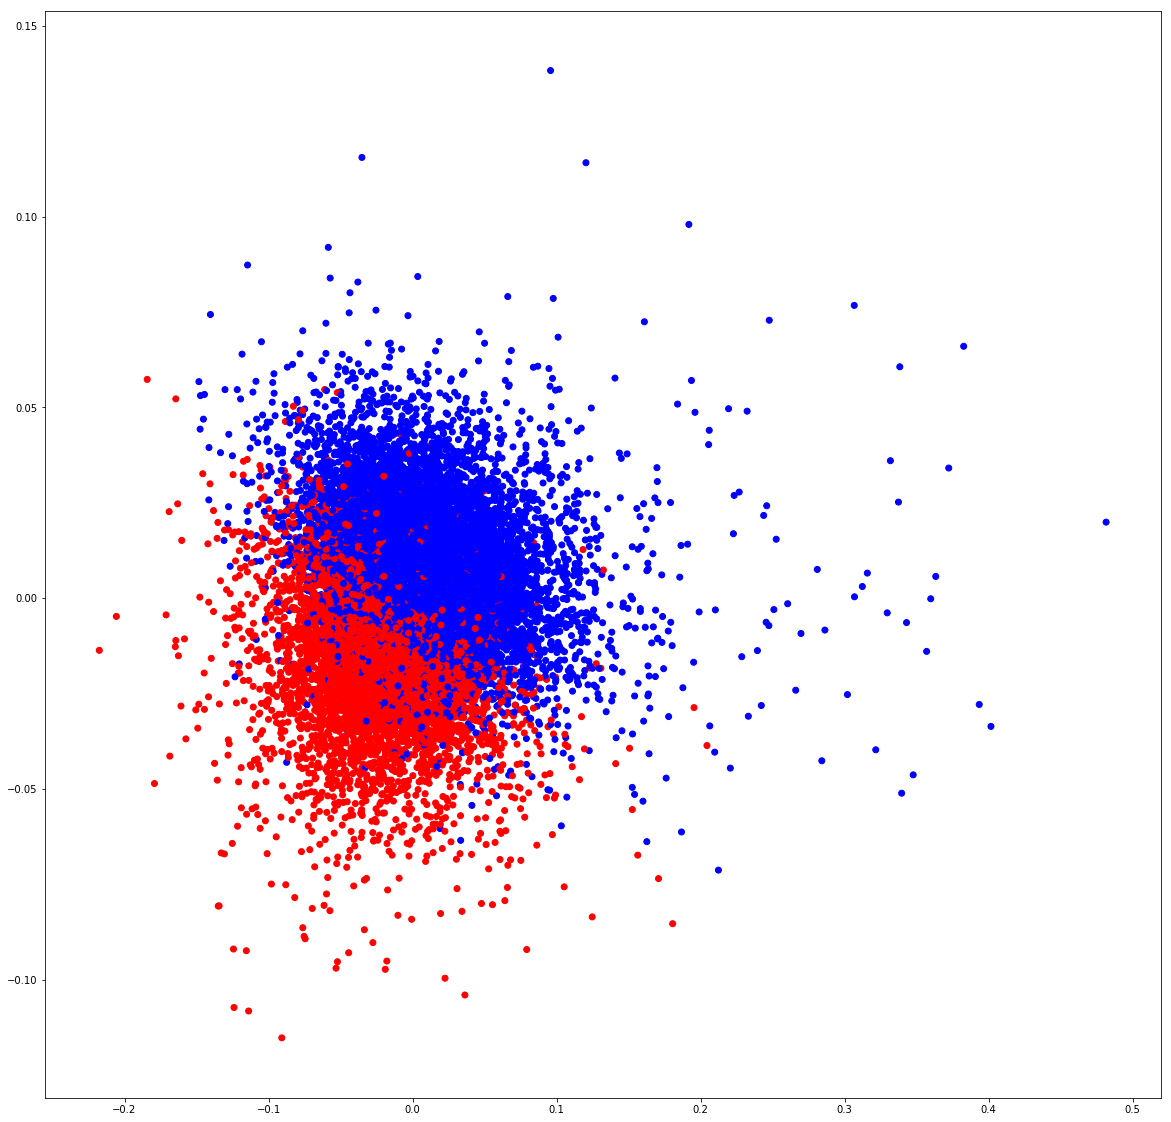

In [101]:
plt.figure(figsize=(20,20))
plt.scatter(plot_g['x'], plot_g['y'], c=polar_d)


In [113]:
nonpolitical5_similar = pd.DataFrame({'text': nonpolitical_similar})
all_nonpolitical5counts = nonpolitical5_similar['text'].str.split(expand=True).unstack().value_counts()
all_nonpolitical5counts[0:30]

true             484
check            149
good             123
happy             91
go                76
sir               64
buy               64
u                 61
join              58
night             57
well              53
india             50
video             43
narendramodi      40
follow            39
morning           38
birthday          36
please            35
imvkohli          34
watch             33
bjp               32
day               31
officeofrg        30
wish              30
cmofkarnataka     29
twitter           29
read              29
new               29
incindia          28
youtube           28
dtype: int64

In [112]:
congress5_similar = pd.DataFrame({'text': congress_similar})
all_congress5counts = congress5_similar['text'].str.split(expand=True).unstack().value_counts()
all_congress5counts[0:30]

win              478
officeofrg       395
nice             240
r                218
sir              214
work             213
state            210
ji               191
good             174
rahul            169
congress         165
india            162
u                151
siddaramaiah     148
day              139
incindia         129
karnataka        111
bjp               98
cmofkarnataka     77
happy             76
narendramodi      75
3                 75
2                 69
great             68
week              67
budget            64
one               62
modi              59
pm                53
people            53
dtype: int64

In [95]:
#from collections import Counter

In [96]:
#counter_bjp = Counter(index_bjp)

In [97]:
#counter_congress = Counter(index_congress)

In [98]:
#counter_nonpolitical = Counter(index_non_political)

In [94]:
# bjp_common =[]
# for idx, val in counter_bjp.items():
#     if val >= 2:
#         bjp_common.append(idx)

In [93]:
# congress_common = []
# for idx, val in counter_congress.items():
#     if val >= 2:
#         congress_common.append(idx)

In [92]:
# nonpolitical_common =[]
# for idx, val in counter_nonpolitical.items():
#     if val >= 2:
#         nonpolitical_common.append(idx)

In [91]:
# for i in bjp_common:
#     print(docs_tokenized[i])

In [89]:
# for i in congress_common:
#     print(docs_tokenized[i])

In [90]:
# for i in nonpolitical_common:
#     print(docs_tokenized[i])

In [102]:
for i in index_bjp:
    print(docs_tokenized[i])

AnalyzedDocument(words=['amritacheematv', 'mhundwa7', 'dwnews', 'great', 'work', 'looking', 'lovely', 'pic'], tags=[593097])
AnalyzedDocument(words=['sambitswaraj', 'zeenews', 'aajtak', 'news18india', 'timesnow', 'republic', 'indiatoday', 'sir', 'ongc', 'work'], tags=[344855])
AnalyzedDocument(words=['work', 'published', 'indian', 'express'], tags=[117115])
AnalyzedDocument(words=['work', 'fatigue', 'professions', 'defined', 'middle', 'class', 'aspiration', 'sites', 'deepening', 'discontent'], tags=[22595])
AnalyzedDocument(words=['hy', 'loads', 'work'], tags=[44574])
AnalyzedDocument(words=['shivaku78650011', 'kicchasudeep', 'awesome', 'work', 'bro', '❤😍👌'], tags=[124481])
AnalyzedDocument(words=['bck', 'work', 'work', 'work'], tags=[78733])
AnalyzedDocument(words=['work', 'worship'], tags=[640908])
AnalyzedDocument(words=['roopa', 'ips', 'hats', 'prominent', 'work'], tags=[644209])
AnalyzedDocument(words=['harder', 'work', 'harder', 'surrender'], tags=[472638])
AnalyzedDocument(words

In [106]:
for i in index_congress:
    print(docs_tokenized[i])

AnalyzedDocument(words=['superb', 'video', 'nice', 'work', 'youtube'], tags=[5098])
AnalyzedDocument(words=['acpnorthtrdvn', 'addlcptraffic', 'dcptrwestbcp', 'blrcitytraffic', 'nice', 'work'], tags=[188436])
AnalyzedDocument(words=['dcptrwestbcp', 'nice', 'meeting', 'sri', 'shivakumar', 'ji', 'people', 'going', 'good', 'sir'], tags=[405359])
AnalyzedDocument(words=['loose', 'modi', 'ji', 'love', 'honest', 'work', 'love', 'selflessness', 'love', 'modi', 'ji'], tags=[3144])
AnalyzedDocument(words=['siddaramaiah', 'nice', 'sir', 'accepted', 'perfect', 'knowledgeble', 'cm', 'karnataka'], tags=[445394])
AnalyzedDocument(words=['rajeev', 'mp', 'siddaramaiah', 'namma', 'bengaluru', 'unitedbengaluru', 'narendramodi', 'drharshvardhan', 'ananthkumar', 'bjp', 'great', 'work', 'sir'], tags=[478197])
AnalyzedDocument(words=['rangoli', 'vd', 'spl', 'good', 'start', 'flim', 'payasa', "'s", 'song', 'neetu', 'ji', 'v', 'nice'], tags=[271873])
AnalyzedDocument(words=['raj03', 'superb', 'pic', 'mithali',

AnalyzedDocument(words=['nice', 'police', 'officer', 'good', 'job', 'salute', '🤔✌'], tags=[419])
AnalyzedDocument(words=['alokkalagi06', 'bpacofficial', 'sir', 'vision', 'n', 'manifesto', 'bommanahalli', 'shared', 'working', '3', 'lakes', 'get', 'opportunity', 'wl', 'work', 'bellandur'], tags=[383638])
AnalyzedDocument(words=['yogital', 'sallybundockbbc', 'nice', 'tell', 'name'], tags=[592794])
AnalyzedDocument(words=['malllige', 'nice', 'pic', 'stay', 'blessed'], tags=[237095])
AnalyzedDocument(words=['great', 'seeing', 'dineshgrao', 'ji', 'working', 'strengthen', 'incindia', 'karnataka', 'thanks', 'visiting', 'sir', 'ji'], tags=[62314])
AnalyzedDocument(words=['rescue', 'op', 'donkey', 'work', 'bangalore', 'mirror'], tags=[584623])
AnalyzedDocument(words=['prahladspatel', 'ramlal', 'superb', 'work', 'congratulations', 'sir'], tags=[21269])
AnalyzedDocument(words=['cmofkarnataka', 'incbasavakalyan', 'siddaramaiah', 'superb'], tags=[404507])
AnalyzedDocument(words=['beti', 'bachov', 'b

AnalyzedDocument(words=['jenniferkotwal', 'super', 'cool', 'profile', 'picture', 'rock', 'keep', 'good', 'work', 'god', 'bless', 'take', 'care'], tags=[432307])
AnalyzedDocument(words=['advocate', 'co', 'great', 'nice'], tags=[406843])
AnalyzedDocument(words=['nice', 'points'], tags=[449739])
AnalyzedDocument(words=['prakashraaj', 'ji', 'rd', 'column', 'avaravarabhavakke', 'nice', 'read', 'writings'], tags=[425706])
AnalyzedDocument(words=['sir', 'drkamineni', 'bjp', 'vry', 'sad', 'inform', 'phc', 'sangamjagarlamudi', 'tenali', 'mandala', 'demolished', 'yet', 'construction', 'work', 'started', 'sad', '9849371777', 'ncbn', 'naralokesh', 'andhrapradeshcm'], tags=[119975])
AnalyzedDocument(words=['every', 'state', 'work', 'curbing', 'middlemen', 'benefits', 'farmers', 'consumers', 'pmoindia'], tags=[80257])
AnalyzedDocument(words=['looks', 'like', 'full', 'house', 'sir', 'superb'], tags=[339832])
AnalyzedDocument(words=['vaishu', 'ji', 'swarup58', 'hrdministry', 'prakashjavdekar', 'narend

AnalyzedDocument(words=['vishweshwarbhat', 'officeofrg', 'mla', 'jeeavraj'], tags=[596846])
AnalyzedDocument(words=['jigneshmevani80', '3', '6', 'narrow', 'political', 'ends', 'looks', 'like', 'una', 'incident', 'congress', 'funded', 'sponsored', 'act', 'atychar', 'sab', 'par', 'ho', 'rahen', 'hain', 'sabka', 'life', 'precious', 'hai', 'issme', 'kyun', 'cheap', 'politics', 'kar', 'rahe', 'ho', 'haha', 'parivarvaad', 'kya', 'praksah', 'ambedkar', 'rahul', 'gandhi', 'sachin', 'pilot', 'hooda', 'junior', 'gogoi', 'junior', '4', '6'], tags=[252040])
AnalyzedDocument(words=['indiatodayflash', 'officeofrg', 'please', 'enlighten', 'following', 'movies', 'kutra', 'patrilai', 'porkalathil', 'oru', 'poo', 'banned', 'congress', 'rule'], tags=[182275])
AnalyzedDocument(words=['ajayacharya', 'officeofrg', 'rssurjewala', 'mostly', 'purchased', 'sunday', 'bazaar', 'chor', 'bazaar'], tags=[114754])
AnalyzedDocument(words=['laluprasadrjd', 'yadavtejashwi', 'officeofrg', 'together', 'shud', 'find', 'com

AnalyzedDocument(words=['msdhoni', 'finishing', 'win', 'games', '😍😍😍', 'indvsa', 'live'], tags=[427726])
AnalyzedDocument(words=['india', 'bcci', 'win', 'indvssa'], tags=[341112])
AnalyzedDocument(words=['best', 'way', 'win', 'intolerable', 'tolerate', 'seldom', 'dealt'], tags=[52878])
AnalyzedDocument(words=['congratulate', 'ace', 'shuttle', 'player', 'kidambi', 'srikanth', 'thrashes', 'lee', 'south', 'korea', '21', '10', '21', '5', 'win', 'prestigious', 'denmarkopen2017'], tags=[318547])
AnalyzedDocument(words=['aravind', 'sets', 'big', 'bangalore', 'win', 'espn'], tags=[255831])
AnalyzedDocument(words=['kapildev', '1983worldcup', 'champions', 'relived', 'historic', 'win', 'ranveerofficial'], tags=[223830])
AnalyzedDocument(words=['india', 'win', 'bumraah'], tags=[315886])
AnalyzedDocument(words=['entered', 'win', 'flight', 'manchester', 'accomodation', 'match', 'tickets', 'cityprizes', 'mancity'], tags=[579245])
AnalyzedDocument(words=['rohit', 'sharma', '72', 'powers', 'india', 'wi

AnalyzedDocument(words=['priyankkharge', 'reachmbp', '2015', 'presentation', 'organised', 'intach', 'room', 'filled', 'brim'], tags=[437041])
AnalyzedDocument(words=['article', 'hasya', 'mela', 'held', 'rv', 'dental', 'collede', 'auditorium', 'sunday'], tags=[401853])
AnalyzedDocument(words=['andhra', 'state', 'government', 'issued', 'go', '14', 'monday', 'night', 'converting', 'existing', 'telugu', 'medium', 'municipal'], tags=[522730])
AnalyzedDocument(words=['good', 'morning', 'ajanta', 'caves', 'aurangabad', 'district', 'maharashtra', 'state', 'india', '29', 'rock', 'cut'], tags=[177171])
AnalyzedDocument(words=['kar', 'ahead', 'al', 'othr', 'states', 'job', 'creation', 'attracting', 'investment', 'thnks', 'sri', 'siddaramaiah', "'s", 'impactful', 'governancevisionary', 'leadership'], tags=[394880])
AnalyzedDocument(words=['wish', 'happy', 'karnataka', 'bandh', 'wednesday', 'new', 'festival', 'state'], tags=[616441])
AnalyzedDocument(words=['needa', 'break', 'nammahdk', 'dp', 'sati

AnalyzedDocument(words=['peasant', 'bhushan', 'congress', 'yashwant', 'sinha', 'congress', '🤔🤔'], tags=[610961])
AnalyzedDocument(words=['kunalchoudhary', 'massive', 'crowd', 'rahul', 'karanataka'], tags=[272481])
AnalyzedDocument(words=['rahul', 'ghandhi', 'hit', 'head', 'mount', 'everest', 'bleed', 'dangerous', 'level', 'myanmar', 'tamil', 'hindu', 'fans', 'pm', 'modi'], tags=[66718])
AnalyzedDocument(words=['08', '01', '2014', 'huge', 'amount', 'rs', '500', 'crores', 'incs', 'rahul', "'s", 'money', 'come', '…'], tags=[55283])
AnalyzedDocument(words=['josjesnu', 'rahul', 'ghandhis', 'election', 'manifestooo'], tags=[363095])
AnalyzedDocument(words=['sarfaraz', 'rahul', 'mosarcb'], tags=[412038])
AnalyzedDocument(words=['abd', 'great', 'ball', 'ashwin', 'r'], tags=[320514])
AnalyzedDocument(words=['incindia', 'jai', 'congress'], tags=[206278])
AnalyzedDocument(words=['madversity', 'officeofrg', 'ndtv', 'r', 'many', 'talented', 'youngsters', 'r', 'available\u200b', 'inc', 'rg', 'right'

AnalyzedDocument(words=['turns', 'shinzo', 'abe', 'dynast', 'modi', 'ji', 'hugging', 'dynast', 'hope', 'smritiirani', 'press', 'conference', 'clarifying', '😁'], tags=[511510])
AnalyzedDocument(words=['got', 'black', 'money', 'back', 'switzerland', 'plane', 'rahul', 'asks', 'pm', 'modi', 'oneindia'], tags=[162273])
AnalyzedDocument(words=['economictimes', 'rahul', 'ji', 'world', 'no', "'s", 'pujya', 'pm', 'modi', 'ji', "'s", 'model', '70year', "'s", 'history', 'gandhi', "'s", 'family', 'rule', "'s", 'country', 'giving', '2', 'country', 'looting', 'country'], tags=[129843])
AnalyzedDocument(words=['beingsalmankhan', 'one', 'best', 'moments', 'bhai', 'always', 'king', 'bhai'], tags=[434025])
AnalyzedDocument(words=['vaithee58', 'obviously', 'pappu'], tags=[69440])
AnalyzedDocument(words=['ctravi', 'bjp', 'bjp4karnataka', 'preaching', 'rahul', 'gandhi'], tags=[271798])
AnalyzedDocument(words=['incindia', 'mr', 'rahul', 'gandhi', 'files', 'nomination', 'wish', 'best', 'congress', 'president

In [261]:
#model_doc2vec = doc2vec.Doc2Vec(docs_tokenized, vector_size = 600, min_count = 500, workers = 4)

In [114]:
bjp_mostwords = all_bjp5counts[0:100]

In [116]:
congress_mostwords = all_congress5counts[0:100]

In [117]:
nonpolitical_mostwords = all_nonpolitical5counts[0:100]

In [118]:
type(bjp_mostwords)

pandas.core.series.Series

In [119]:
bjp_mostwords.to_excel("bjp_mostwords.xlsx")

In [120]:
congress_mostwords.to_excel("congress_mostwords.xlsx")

In [121]:
nonpolitical_mostwords.to_excel("nonpolitical.xlsx")

In [123]:
bjp_similar

['amritacheematv mhundwa7 dwnews great work looking lovely pic',
 'sambitswaraj zeenews aajtak news18india timesnow republic indiatoday sir ongc work',
 'work published indian express',
 'work fatigue professions defined middle class aspiration sites deepening discontent',
 'hy loads work',
 'shivaku78650011 kicchasudeep awesome work bro ❤😍👌',
 'bck work work work',
 'work worship',
 'roopa ips hats prominent work',
 'harder work harder surrender',
 'secularism work',
 'work published indian express',
 'comedy santhanam work nanbenda iamsanthanam udhaystalin',
 'progressive work artists corporate willing fund cleaning work kjgeorge thekjgeorge btvnewslive',
 'inaugurated road repair work 10 30 km bhatmbra bhatsangavi tq bhalki hkrdb micro',
 'rehmansid work worship',
 'pawar work n33r4j iamnarendranath arungiri sujataanandan 🤔',
 'carpenter repair amp furniture work jaipur jaipur',
 'socialepfo sir anychance uan website work',
 'kanchipuram silks sarees original hom work',
 'nowplaying